In [1]:
import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Churn.csv")

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.drop("CustomerId",axis=1,inplace=True)

In [5]:
df.head(10)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
df.drop(["Surname","RowNumber"],axis=1,inplace=True)

In [7]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
len(df["CreditScore"])

10000

In [11]:
df["CreditScore"]

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [12]:
type(df["CreditScore"])

pandas.core.series.Series

In [57]:
col=["CreditScore","Age","Balance","EstimatedSalary","Tenure"]
from sklearn.preprocessing import MinMaxScaler
d=MinMaxScaler()
df[col]=d.fit_transform(df[col])

In [14]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.283784,0.5,0.000000,2,1,0,0.481341,0
9996,0.332,France,Male,0.229730,1.0,0.228657,1,1,1,0.508490,0
9997,0.718,France,Female,0.243243,0.7,0.000000,1,0,1,0.210390,1
9998,0.844,Germany,Male,0.324324,0.3,0.299226,2,1,0,0.464429,1


In [15]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.283784,0.5,0.000000,2,1,0,0.481341,0
9996,0.332,France,Male,0.229730,1.0,0.228657,1,1,1,0.508490,0
9997,0.718,France,Female,0.243243,0.7,0.000000,1,0,1,0.210390,1
9998,0.844,Germany,Male,0.324324,0.3,0.299226,2,1,0,0.464429,1


In [16]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [17]:
import pandas as pd

# Create a DataFrame
wq = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Define a 2D array
new_data = [[7], [9], [11]]
fr=np.array(new_data)
# Assign the 2D array to a column
wq["C"] = fr

print(wq)

   A  B   C
0  1  4   7
1  2  5   9
2  3  6  11


In [18]:
type(wq["C"])

pandas.core.series.Series

In [19]:
type(wq["A"])

pandas.core.series.Series

In [20]:
for column in col:
    print(column)
    break

CreditScore


In [21]:
subcol=["Geography","Gender","NumOfProducts"]

In [22]:
y=pd.get_dummies(data=df,columns=subcol)

In [23]:
y

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0.324324,0.2,0.000000,1,1,0.506735,1,1,0,0,1,0,1,0,0,0
1,0.516,0.310811,0.1,0.334031,0,1,0.562709,0,0,0,1,1,0,1,0,0,0
2,0.304,0.324324,0.8,0.636357,1,0,0.569654,1,1,0,0,1,0,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0,0,0.469120,0,1,0,0,1,0,0,1,0,0
4,1.000,0.337838,0.2,0.500246,1,1,0.395400,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,1,0,0.481341,0,1,0,0,0,1,0,1,0,0
9996,0.332,0.229730,1.0,0.228657,1,1,0.508490,0,1,0,0,0,1,1,0,0,0
9997,0.718,0.243243,0.7,0.000000,0,1,0.210390,1,1,0,0,1,0,1,0,0,0
9998,0.844,0.324324,0.3,0.299226,1,0,0.464429,1,0,1,0,0,1,0,1,0,0


In [24]:
x=y.drop("Exited",axis=1)

In [25]:
y=y["Exited"]

In [26]:
x.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3',
       'NumOfProducts_4'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.2)

In [28]:
model=keras.Sequential([
    keras.layers.Dense(120,input_shape=(16,),activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
tb_call=keras.callbacks.TensorBoard(log_dir="logs/1",histogram_freq=1)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [29]:
model.fit(x,y,epochs=100,callbacks=[tb_call])

Epoch 1/100
313/313 [==============================] - 3s 4ms/step - loss: 0.4141 - accuracy: 0.8205
Epoch 2/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3728 - accuracy: 0.8427
Epoch 3/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3627 - accuracy: 0.8452
Epoch 4/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3559 - accuracy: 0.8506
Epoch 5/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.8548
Epoch 6/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8559
Epoch 7/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3421 - accuracy: 0.8608
Epoch 8/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8590
Epoch 9/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8603
Epoch 10/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3355 - accura

313/313 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.8915
Epoch 82/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2645 - accuracy: 0.8893
Epoch 83/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2652 - accuracy: 0.8881
Epoch 84/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2616 - accuracy: 0.8899
Epoch 85/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2600 - accuracy: 0.8923
Epoch 86/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2599 - accuracy: 0.8929
Epoch 87/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.8895
Epoch 88/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.8930
Epoch 89/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.8904
Epoch 90/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2577 - accuracy: 

In [30]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.2320 - accuracy: 0.9055


[0.23202861845493317, 0.9054999947547913]

In [31]:
y_pred=model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [32]:
y_pred[0]

array([0.00717504], dtype=float32)

In [33]:
type(y_test)

pandas.core.series.Series

In [34]:
po=[]
for i in y_pred:
    if i>0.5:
        po.append(1)
    else:
        po.append(0)
print(po)

[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

In [35]:
y_pred=pd.Series(po)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
typ=classification_report(y_test,y_pred)

In [37]:
print(typ)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1564
           1       0.88      0.66      0.75       436

    accuracy                           0.91      2000
   macro avg       0.89      0.82      0.85      2000
weighted avg       0.90      0.91      0.90      2000



In [38]:
fop=confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'truth')

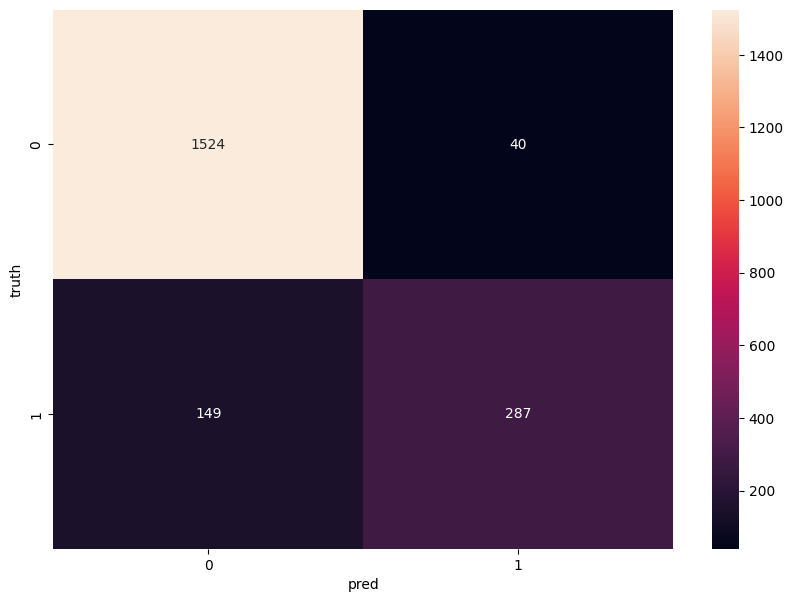

In [39]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(fop,annot=True,fmt="1")
plt.xlabel("pred")
plt.ylabel("truth")


In [40]:
#CreditScore	Geography	Gender	Age	Tenure	Balance	NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary	Exited

In [41]:
#619	France	Female	42	2	1234.00	1	1	1	101348.88

In [42]:
qwert=[550,"France","male",30,4,219001.00,2,0,1,213448.88]

In [43]:
zlx=d.transform([[qwert[0],qwert[3],qwert[4],qwert[5],qwert[9]]])

C:\Users\lenin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [44]:
zlx

array([[4.00000000e-01, 1.62162162e-01, 1.59427280e-05, 1.09505168e+00,
        2.13448880e+04]])

In [45]:
lis=[]
if qwert[1]=="Germany":
    lis.append([0,1,0])
elif qwert[1]=="France":
    lis.append([1,0,0])
else:
    lis.append([0,0,1])
sdcard=np.array(lis)
lis2=[]
if qwert[2]=="Female":
    lis2.append([1,0])
else:
    lis2.append([0,1])
sdcard2=np.array(lis2)
lis3=[0,0,0,0]
if qwert[6]==1:
    lis3[0]=1
elif qwert[6]==2:
    lis3[1]=1
elif qwert[6]==3:
    lis3[2]=1
else:
    lis3[3]=1
lis3=[lis3]
sdcard3=np.array(lis3)
print(sdcard)
print(sdcard2)
print(sdcard3)
num=np.concatenate([sdcard,sdcard2,sdcard3],axis=1)
print(num)
import itertools
num=num.tolist()
oned = list(itertools.chain(*num))
sfg=zlx.tolist()
oned2 = list(itertools.chain(*sfg))
oned2.extend(oned)
print(oned2)
oned2.insert(4,qwert[7])
oned2.insert(5,qwert[8])
print([oned2])

[[1 0 0]]
[[0 1]]
[[0 1 0 0]]
[[1 0 0 0 1 0 1 0 0]]
[0.4, 0.16216216216216217, 1.5942727981707635e-05, 1.095051677435195, 21344.888000000003, 1, 0, 0, 0, 1, 0, 1, 0, 0]
[[0.4, 0.16216216216216217, 1.5942727981707635e-05, 1.095051677435195, 0, 1, 21344.888000000003, 1, 0, 0, 0, 1, 0, 1, 0, 0]]


In [46]:
pawan_Kalyan=model.predict([oned2])

1/1 [==============================] - 0s 151ms/step


In [47]:
pawan_Kalyan[0][0]

1.0

In [48]:
#col=["CreditScore","Age","Balance","EstimatedSalary","Tenure"]
#from sklearn.preprocessing import MinMaxScaler
#d=MinMaxScaler()
#d.fit(df[["CreditScore"]])
#df["CreditScore"]=d.transform(df[["CreditScore"]])
#d.fit(df[["Age"]])
#df["Age"]=d.transform(df[["Age"]])
#d.fit(df[["Balance"]])
#df["Balance"]=d.transform(df[["Balance"]])
#d.fit(df[["EstimatedSalary"]])
#df["EstimatedSalary"]=d.transform(df[["EstimatedSalary"]])
#d.fit(df[["Tenure"]])
#df["Tenure"]=d.transform(df[["Tenure"]])

In [49]:
#min max scalar can only be fitted one time if you fit it again then it could override the model  so you can trasform multiple /
#->columns into min max but while predicting your own values you need to transform those into converted columns type hence as /
#it is overided you can't transform all the custom values which are from different column category !! hence we get below error!

In [50]:
#X has 5 features, but MinMaxScaler is expecting 1 features as input.

In [51]:
#But we can use different min max scalar models for each individual column AND fit to the respected column it is just complex /
#and messy after that while predicting with custom values you need to write a large code for each individual column value /
#so it is very huge and complex.

In [52]:
#hence we need to write the first or top-first code where the model is itself fitted and transformed those fitted dataframe /
#and returned the new dataframe that is asigned to the existed dataframe with multiple columns,so here we fitted only once with whole dataframe.  

In [53]:
#So in both cases you can convert the columns(Remember that is overrided) into minmax but you can face problems while pridicting with our own samples

In [54]:
#finally if we thought why we need to worry while predicting our own values there is a quite simple solution that you /
#can use column transformer with list of tuples as arguments with minmax and one hot encodeder where we done it in other code.